
# Integrantes:

## Jose David Garavito Barragán - 2200019 - Grupo PA2 - 12:00pm

## Jose Raul Martinez Afanador - 2200797 - Grupo A1 - 6:00am

## Nathalia Alexandra Perez Rojas - 2200023 - Grupo A1 - 6:00am

"El exito no espera" 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importamos los datos

In [2]:
active_power = pd.read_csv("Global_active_power.csv") #Datos Global_Intensity

intensity = pd.read_csv("Global_intensity.csv") #Datos de Intensidad

reactive_power = pd.read_csv("Global_reactive_power.csv") #Datos de potencia reactiva

voltage = pd.read_csv("Voltage.csv") #Datos de Voltaje


Combinamos estos 4 tipo de datos en un solo dataframe.

In [3]:
info = active_power #Creamos el Dateframe se ciclará en el for y lo igualamos a al primer conjunto de datos para que poseea
                    #la información necesaria para que el comando merge lo trabaje.

for i in [intensity, reactive_power, voltage ]: #Vamos por ciclos conbinando los diferentes tipos de datos.
    info = pd.merge(info, i, on ="datetime")

info['datetime'] = pd.to_datetime(info['datetime'])#Le indico A Pandas que la columna "Datetime" corresponde a la columna "datetime"
                                                   #que el espera leer para poder aplicar el resample

In [4]:
info

,datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


In [5]:
info_day = info.resample('D', on = 'datetime').mean().dropna() #El resample a días los .dropna() y .fillna(0) son para arrelgar
                                                               #el problemas de las cración de Nan's
#.dropna()

#.fillna(0)

info_day


,Global_active_power,Global_intensity,Global_reactive_power,Voltage
datetime,,,,
2010-01-01,0.850175,3.537083,0.114817,242.565722
2010-01-02,1.176235,4.857778,0.086656,243.631743
2010-01-03,0.901894,3.757778,0.090331,241.822778
2010-01-04,1.171833,4.879028,0.100322,241.754160
2010-01-05,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...
2010-12-07,0.770538,3.397222,0.198550,240.218646
2010-12-08,0.367846,1.623750,0.117429,240.794931
2010-12-09,1.119508,4.755694,0.139832,241.619722


In [6]:
info_month = info.resample('M', on = 'datetime').mean() #Hago el resample en meses

info_month

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
datetime,,,,
2010-01-31,1.300640,5.430332,0.125182,242.338522
2010-02-28,1.157539,4.836624,0.109467,242.002101
2010-03-31,1.170015,4.920399,0.136368,241.475284
2010-04-30,1.036334,4.363496,0.129557,241.442527
2010-05-31,1.075957,4.551504,0.127221,241.296151
2010-06-30,0.975306,4.170282,0.145525,240.888985
2010-07-31,0.778947,3.337202,0.138093,240.965167
2010-08-31,0.929452,3.954423,0.130815,241.422944
2010-09-30,0.997541,4.223837,0.127700,241.267517


## Arreglos


Realizaremos las regresiones lineales

In [7]:
from scipy.optimize import curve_fit 

In [8]:
#Definimos la funciones

def func1(x, a, b): #Funcion lineal que piden para la realción 1  y 2 del indicativo. 
    return a*x+b

def func2(T,a, b, c): #Funcion lineal de dos variables que piden para la realción 3 del indicativo. 
    
    x,y = T
    
    return a*x+b*y+c



Trabajamos la función "Global_active_power = A * Global_intensity + B"-------------------------------------------------------------------------------------------

In [9]:
#Regresión con la funcion 1 para todos los datos, caso "Global_intensity vs Global_active_power"
valores_1, cov_1 = curve_fit(func1,info['Global_intensity'], info['Global_active_power'] ) #Aplicamos el curve_fit a info 
print(valores_1, cov_1)

[ 0.2380262  -0.00498205] [[ 3.46180362e-10 -1.55034856e-09]
 [-1.55034856e-09  1.22472325e-08]]


In [10]:
#Regresión con la funcion 1 para los datos de días, caso "Global_intensity vs Global_active_power"
valores_2, cov_2 = curve_fit(func1,info_day['Global_intensity'], info_day['Global_active_power'] ) #Aplicamos el curve_fit a info_day
print(valores_2, cov_2)

[ 0.24305793 -0.02753221] [[ 3.60524111e-07 -1.61599679e-06]
 [-1.61599679e-06  7.96556511e-06]]


In [11]:
#Regresión con la funcion 1 para los datos de meses, caso "Global_intensity vs Global_active_power"
valores_3, cov_3 = curve_fit(func1,info_month['Global_intensity'], info_month['Global_active_power'] ) #Aplicamos el curve_fit a info_month
print(valores_3, cov_3)

[ 0.25042854 -0.06067193] [[ 6.53213024e-06 -2.93259233e-05]
 [-2.93259233e-05  1.33360438e-04]]


Trabajamos la función "Global_active_power = A * Voltage + B"-----------------------------------------------------------------------------------------------------

In [12]:
#Regresión con la funcion 1 para todos los datos, caso "Voltage vs Global_active_power"
valores_11, cov_11 = curve_fit(func1,info['Voltage'], info['Global_active_power'] ) #Aplicamos el curve_fit a info 
print(valores_11, cov_11)

[-0.13586092 33.87352423] [[ 1.93757045e-07 -4.67953331e-05]
 [-4.67953331e-05  1.13033742e-02]]


In [13]:
#Regresión con la funcion 1 para los datos en días, caso "Voltage vs Global_active_power"
valores_22, cov_22 = curve_fit(func1,info_day['Voltage'], info_day['Global_active_power'] ) #Aplicamos el curve_fit a info_day
print(valores_22, cov_22)

[ 0.0296603  -6.10166907] [[ 1.53189306e-04 -3.69985603e-02]
 [-3.69985603e-02  8.93632254e+00]]


In [14]:
#Regresión con la funcion 1 para los datos en meses, caso "Voltage vs Global_active_power"
valores_33, cov_33 = curve_fit(func1,info_month['Voltage'], info_month['Global_active_power'] ) #Aplicamos el curve_fit a info_month
print(valores_33, cov_33)

[  0.17281052 -40.67097826] [[ 3.59400196e-03 -8.67969399e-01]
 [-8.67969399e-01  2.09619833e+02]]


Trabajamos la función "Global_active_power = A * Global_intensity + B * Voltage + c"--------------------------------------------------------------------------------------------

In [15]:
#Regresión con la funcion 2 para todos los datos, caso "Global_intensity and Voltage vs Global_active_power"
valores_111, cov_111 = curve_fit(func2, (info['Global_intensity'],info['Voltage']), info['Global_active_power'], ) #Aplicamos el curve_fit a info 
print(valores_111, cov_111)

[ 0.23947996  0.00466923 -1.13918528] [[ 3.98278208e-10  2.33715096e-10 -5.82294884e-08]
 [ 2.33715096e-10  7.50652075e-10 -1.82340805e-07]
 [-5.82294884e-08 -1.82340805e-07  4.43038990e-05]]


In [16]:
#Regresión con la funcion 2 para los datos de días, caso "Global_intensity and Voltage vs Global_active_power"
valores_222, cov_222 = curve_fit(func2, (info_day['Global_intensity'],info_day['Voltage']), info_day['Global_active_power'], ) #Aplicamos el curve_fit a info_day
print(valores_222, cov_222)

[ 0.24235044  0.00617299 -1.51527187] [[ 2.24889242e-07 -2.17950629e-08  4.25595007e-06]
 [-2.17950629e-08  1.90166376e-07 -4.58316365e-05]
 [ 4.25595007e-06 -4.58316365e-05  1.10507091e-02]]


In [17]:
#Regresión con la funcion 2 para los datos de meses, caso "Global_intensity and Voltage vs Global_active_power"
valores_333, cov_333 = curve_fit(func2, (info_month['Global_intensity'],info_month['Voltage']), info_month['Global_active_power'], ) #Aplicamos el curve_fit a info_month
print(valores_333, cov_333)

[ 0.24524991  0.00808133 -1.98910306] [[ 5.81962448e-06 -3.90891703e-06  9.17895831e-04]
 [-3.90891703e-06  6.09992323e-06 -1.45561286e-03]
 [ 9.17895831e-04 -1.45561286e-03  3.47417751e-01]]


## Graficamos

Para "Global_active_power = A * Global_intensity + B" -----------------------------------------------------------------------------------------------------

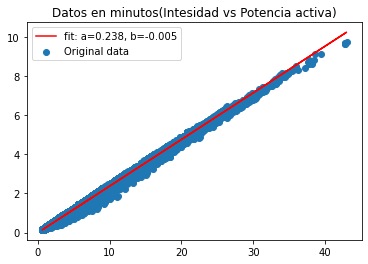

In [18]:
#Grafica la regresión
plt.plot(info['Global_intensity'], func1(info['Global_intensity'], *valores_1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(valores_1))
#Grafica los puntos
plt.scatter(info['Global_intensity'],info['Global_active_power'] ,label="Original data")

plt.legend()#Legenda
plt.title("Datos en minutos(Intesidad vs Potencia activa)") #Titulo
plt.show() #Mostrar las figuras creadas

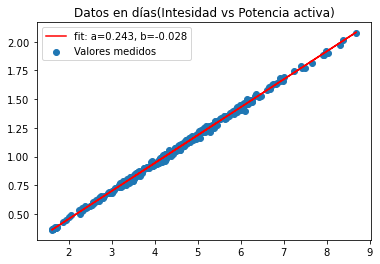

In [19]:
#Grafica la regresión
plt.plot(info_day['Global_intensity'], func1(info_day['Global_intensity'], *valores_2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(valores_2))
#Grafica los puntos
plt.scatter(info_day['Global_intensity'],info_day['Global_active_power'] ,label="Valores medidos")

plt.legend()
plt.title("Datos en días(Intesidad vs Potencia activa)")
plt.show()

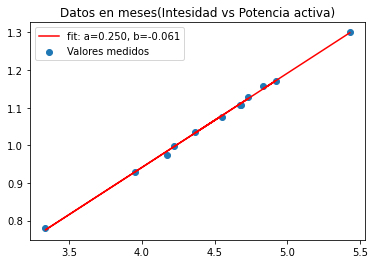

In [20]:
#Grafica la regresión
plt.plot(info_month['Global_intensity'], func1(info_month['Global_intensity'], *valores_3), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(valores_3))
#Grafica los puntos
plt.scatter(info_month['Global_intensity'],info_month['Global_active_power'] ,label="Valores medidos")

plt.legend()
plt.title("Datos en meses(Intesidad vs Potencia activa)")
plt.show()

Para "Global_active_power = A * Voltage + B"-----------------------------------------------------------------------------------------------------

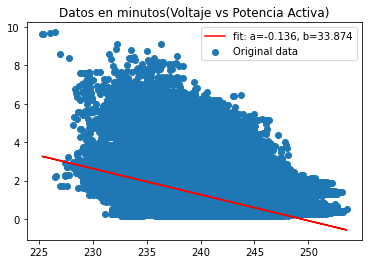

In [21]:
#Grafica la regresión
plt.plot(info['Voltage'], func1(info['Voltage'], *valores_11), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(valores_11))
#Grafica los puntos
plt.scatter(info['Voltage'],info['Global_active_power'] ,label="Original data")
plt.legend()
plt.title("Datos en minutos(Voltaje vs Potencia Activa)")
plt.show()

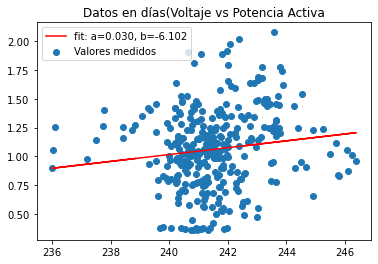

In [22]:
#Grafica la regresión
plt.plot(info_day['Voltage'], func1(info_day['Voltage'], *valores_22), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(valores_22))
#Grafica los puntos
plt.scatter(info_day['Voltage'],info_day['Global_active_power'] ,label="Valores medidos")
plt.legend()
plt.title("Datos en días(Voltaje vs Potencia Activa")
plt.show()

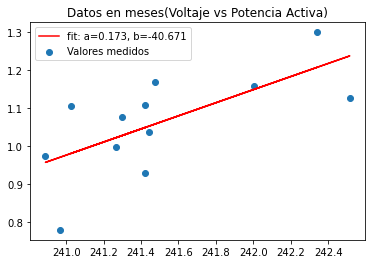

In [23]:
#Grafica la regresión
plt.plot(info_month['Voltage'], func1(info_month['Voltage'], *valores_33), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(valores_33))
#Grafica los puntos
plt.scatter(info_month['Voltage'],info_month['Global_active_power'] ,label="Valores medidos")
plt.legend()
plt.title("Datos en meses(Voltaje vs Potencia Activa)")
plt.show()

Para "Global_active_power = A * Global_intensity + B * Voltage + c"----------------------------------------------------------------------------------------------------------------


In [24]:
#Gráfica en 3D puesto que hay dos varibles independientes.

## Incertidumbres y Coeficiente de correlación de Pearson

Para "Global_active_power = A * Global_intensity + B" -----------------------------------------------------------------------------------------------------

In [25]:
#Calcula la incertidumbre y coeficiente para la relación 1 pedida en el indicativo de la Taréa
print('Para la relación: Global_active_power = A * Global_intensity + B')

for i in [(valores_1, cov_1, 'Minutos'), (valores_2, cov_2, 'Días'), (valores_3, cov_3, 'Meses')]: #for para calcular los datos pedios en los
    val , cov, caso = i  #Contador de for                                                      #Casos de Minutos, días , meses.
    print(f'''
    Caso {caso} : -------------------------''') #Texto para dar orden
    
    incert_a = (cov[0,0])**(1/2) #Se calcula la incertidumbre para A
    print(f'La incertidumbre de A es ±{incert_a}') #Se printea de forma ordenada la incertidumbre
    print(f'El error de A es {(cov[0,0]/val[0])*100}%')#Se printea y calcula el coeficiente de Pearson para A
    
    incert_b = (cov[1,1])**(1/2)#Se calcula la incertidumbre para B
    print(f'La incertidumbre de B es ±{incert_b}')#Se printea de forma ordenada la incertidumbre
    print(f'El error de B es {(cov[1,1]/val[1])*100}%')#Se printea y calcula el coeficiente de Pearson para B
    

Para la relación: Global_active_power = A * Global_intensity + B

    Caso Minutos : -------------------------
La incertidumbre de A es ±1.8605922759278556e-05
El error de A es 1.4543792409640262e-07%
La incertidumbre de B es ±0.00011066721489911734
El error de B es -0.00024582727297441933%

    Caso Días : -------------------------
La incertidumbre de A es ±0.0006004366002054684
El error de A es 0.0001483284687504559%
La incertidumbre de B es ±0.0028223332749294835
El error de B es -0.028931802863859768%

    Caso Meses : -------------------------
La incertidumbre de A es ±0.0025558032483620832
El error de A es 0.0026083808999066717%
La incertidumbre de B es ±0.011548179012113068
El error de B es -0.21980581766649637%


Para "Global_active_power = A * Voltage + B"-----------------------------------------------------------------------------------------------------

In [26]:
#Calcula la incertidumbre y coeficiente para la relación 3 pedida en el indicativo de la Taréa
print('Para la relación: Global_active_power = A * Voltage + B')#Titulo

for i in [(valores_11, cov_11, 'Minutos'), (valores_22, cov_22, 'Días'), (valores_33, cov_33, 'Meses')]: #Usar los datos de la represion de los dataframe minutos, días, meses
    val , cov, caso = i #Contador
    
    print(f'''
    Caso {caso} : -------------------------''') #Texto para dar orden
    
    incert_a = (cov[0,0])**(1/2) #Calulo incertidumbre A
    print(f'La incertidumbre de A es ±{incert_a}') 
    print(f'El error de A es {(cov[0,0]/val[0])*100}%') #Calculo coeficiente Pearson A
    
    incert_b = (cov[1,1])**(1/2)#Calulo incertidumbre B
    print(f'La incertidumbre de B es ±{incert_b}')
    print(f'El error de B es {(cov[1,1]/val[1])*100}%') #Calculo coeficiente Pearson B
    

Para la relación: Global_active_power = A * Voltage + B

    Caso Minutos : -------------------------
La incertidumbre de A es ±0.00044017842393056134
El error de A es -0.00014261426156837818%
La incertidumbre de B es ±0.10631732796825971
El error de B es 0.03336934814003287%

    Caso Días : -------------------------
La incertidumbre de A es ±0.012376966758237679
El error de A es 0.5164793681106449%
La incertidumbre de B es ±2.989368251397748
El error de B es -146.4570174805572%

    Caso Meses : -------------------------
La incertidumbre de A es ±0.0599499954830184
El error de A es 2.079735644851725%
La incertidumbre de B es ±14.478253782017891
El error de B es -515.403960148575%


Para "Global_active_power = A * Global_intensity + B * Voltage + c"----------------------------------------------------------------------------------------------------------------


In [27]:
#Calcula la incertidumbre y coeficiente para la relación 2 pedida en el indicativo de la Taréa
print('Para la relación: Global_active_power = A * Global_intensity + B * Voltage + c')#Titulo

for i in [(valores_111, cov_111, 'Minutos'), (valores_222, cov_222, 'Días'), (valores_333, cov_333, 'Meses')]: #Usar los datos de la represion de los dataframe minutos, días, meses
    
    val , cov, caso = i #Contador
    
    print(f'''
    Caso {caso} : -------------------------''') #Texto orden 
    
    incert_a = (cov[0,0])**(1/2)#Calulo incertidumbre A 
    print(f'La incertidumbre de A es ±{incert_a}')
    print(f'El error de A es {(cov[0,0]/val[0])*100}%') #Calculo coeficiente Pearson A
    
    incert_b = (cov[1,1])**(1/2)#Calulo incertidumbre B
    print(f'La incertidumbre de B es ±{incert_b}')
    print(f'El error de B es {(cov[1,1]/val[1])*100}%') #Calculo coeficiente Pearson B
    
    incert_c = (cov[2,2])**(1/2)#Calulo incertidumbre C
    print(f'La incertidumbre de C es ±{incert_c}')
    print(f'El error de C es {(incert_c/val[2])*100}%') #Calculo coeficiente Pearson C

Para la relación: Global_active_power = A * Global_intensity + B * Voltage + c

    Caso Minutos : -------------------------
La incertidumbre de A es ±1.9956908777245544e-05
El error de A es 1.6630961545682786e-07%
La incertidumbre de B es ±2.739803049127181e-05
El error de B es 1.6076554993353046e-05%
La incertidumbre de C es ±0.00665611741355243
El error de C es -0.5842875188889942%

    Caso Días : -------------------------
La incertidumbre de A es ±0.0004742248856422009
El error de A es 9.279506081553392e-05%
La incertidumbre de B es ±0.0004360806994253985
El error de B es 0.0030806220943985487%
La incertidumbre de C es ±0.10512235305473691
El error de C es -6.9375242196827935%

    Caso Meses : -------------------------
La incertidumbre de A es ±0.002412389785533377
El error de A es 0.0023729364291729758%
La incertidumbre de B es ±0.00246980226487633
El error de B es 0.07548171287274748%
La incertidumbre de C es ±0.5894215389404722
El error de C es -29.632528957532166%


# Conclusiones

Para la primera, segunda y tercera relación, el mejor caso fue con base al coeficiente de Pearson:

- El dataFrame de minutos.

y el peor:

- El dataFrame de meses.


La mejor relación fue la:
    
- La Primera .

La peor:
    
- La segunda. 